<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Magnétostatique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Calcul et représentation des champs magnétostatiques
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib notebook

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt

# Champs magnétostatiques : fils infinis

In [10]:
# Données générales
pos=1.5 # position des sources
i_s=1
mu0=4*np.pi*1e-7
k=mu0/(4*np.pi)

# Maillage de représentation des vecteurs
nd=100 # nombre de points sur un axe
if nd%2!=0 :
    nd+=1 # nd doit être pair pour éviter le point (0,0)
data=np.linspace(-5,5,nd) 
x,y = np.meshgrid( data,data )


i0,x0,y0 = 0*i_s,   0*pos*np.ones(nd), 0*pos*np.ones(nd)  # courant central
i1,x1,y1 = 1*i_s,   1*pos*np.ones(nd), 1*pos*np.ones(nd)  # en haut à droite
i2,x2,y2 = 1*i_s,  -1*pos*np.ones(nd), 1*pos*np.ones(nd)  # en haut à gauche
i3,x3,y3 = -1*i_s,   1*pos*np.ones(nd),-1*pos*np.ones(nd)  # en bas à droite
i4,x4,y4 = -1*i_s,  -1*pos*np.ones(nd),-1*pos*np.ones(nd)  # en bas à gauche

# calcul des distances entre point du maillage et source
r0=np.sqrt((x-x0)**2+(y-y0)**2)
r1=np.sqrt((x-x1)**2+(y-y1)**2)
r2=np.sqrt((x-x2)**2+(y-y2)**2)
r3=np.sqrt((x-x3)**2+(y-y3)**2)
r4=np.sqrt((x-x4)**2+(y-y4)**2)

# calcul du champ magnétique
Bx=k*(-i0/r0**2*(y-y0)-i1/r1**2*(y-y1)-i2/r2**2*(y-y2)-i3/r3**2*(y-y3)-i4/r4**2*(y-y4))
By=k*(i0/r0**2*(x-x0)+i1/r1**2*(x-x1)+i2/r2**2*(x-x2)+i3/r3**2*(x-x3)+i4/r4**2*(x-x4))
# norme du champ magnétique
B_norm  = (np.sqrt(Bx**2 + By**2))
# les vecteurs ont des normes très différentes et on les normalise pour les rendre visibles
BxN = Bx/B_norm
ByN = By/B_norm

skip = (slice(None, None, 4), slice(None, None, 4)) # On ne trace qu'un vecteur sur deux

# code couleur pour les courants (rouge si i>0 (dirigé vers lecteur), bleue si i<0, noir si i=0)
if i0>0 :
    c0='r'
elif i0<0 :
    c0='b'
else :
    c0='white'
if i1>0 :
    c1='r'
elif i1<0 :
    c1='b'
else :
    c1='white'
if i2>0 :
    c2='r'
elif i2<0 :
    c2='b'
else :
    c2='white'
if i3>0 :
    c3='r'
elif i3<0 :
    c3='b'
else :
    c3='white'
if i4>0 :
    c4='r'
elif i4<0 :
    c4='b'
else :
    c4='white'

<IPython.core.display.Javascript object>


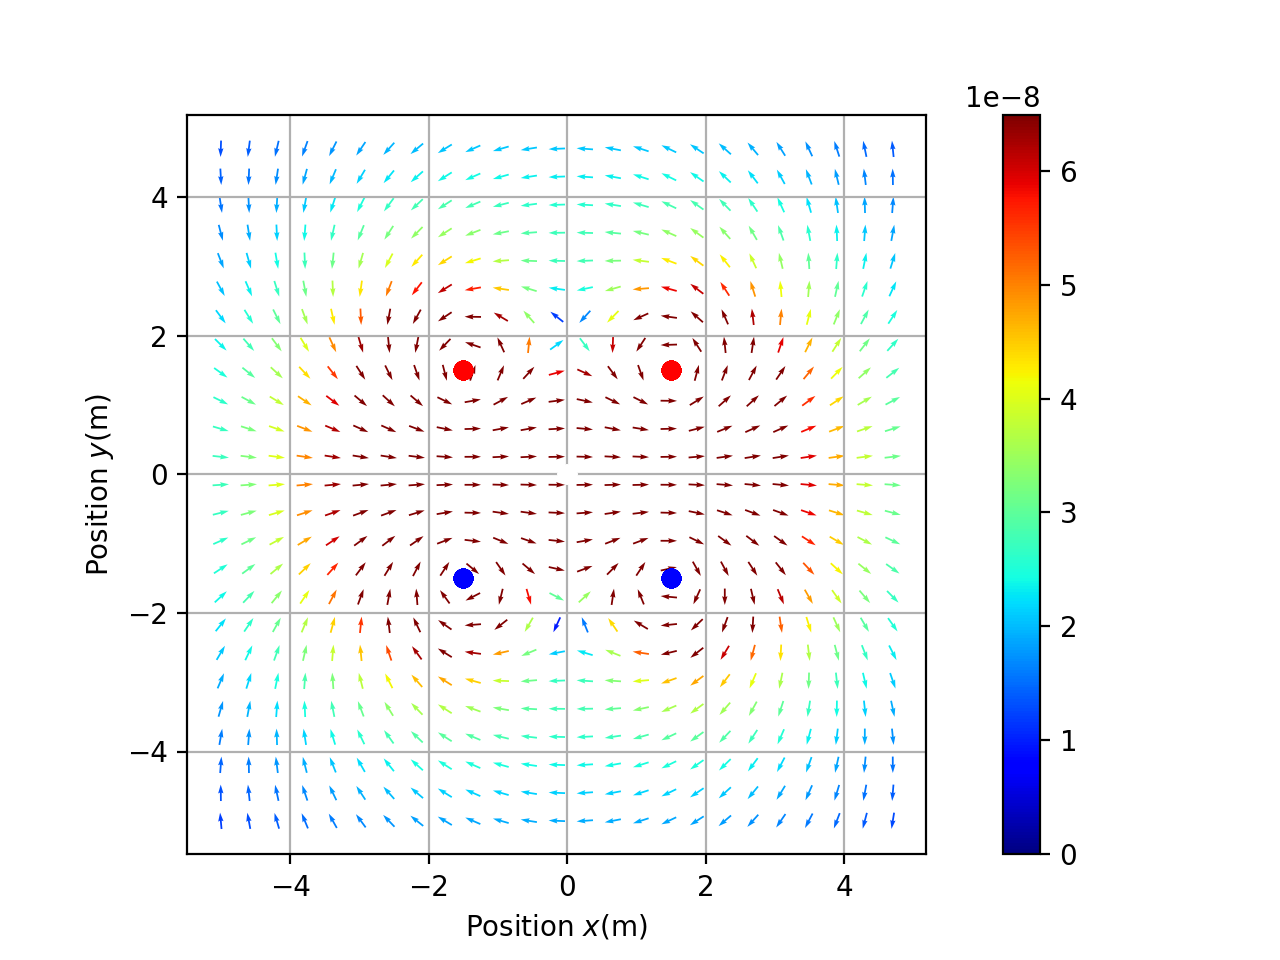

In [11]:
# champ de vecteurs
plt.figure("Vecteurs")

plt.plot(x0,y0,'o',color=c0)
plt.plot(x1,y1,'o',color=c1)
plt.plot(x2,y2,'o',color=c2)
plt.plot(x3,y3,'o',color=c3)
plt.plot(x4,y4,'o',color=c4)

plt.xlim(-2*pos,2*pos)
plt.ylim(-2*pos,2*pos)

plt.quiver(x[skip], y[skip], BxN[skip], ByN[skip], B_norm[skip],pivot='middle', cmap = plt.cm.jet, headlength = 5)

plt.grid(True)

plt.colorbar()
plt.clim(0,np.mean(B_norm[skip]))

plt.xlabel(r'Position $x$(m)')
plt.ylabel(r'Position $y$(m)')

plt.axis('scaled')
plt.show()

<IPython.core.display.Javascript object>


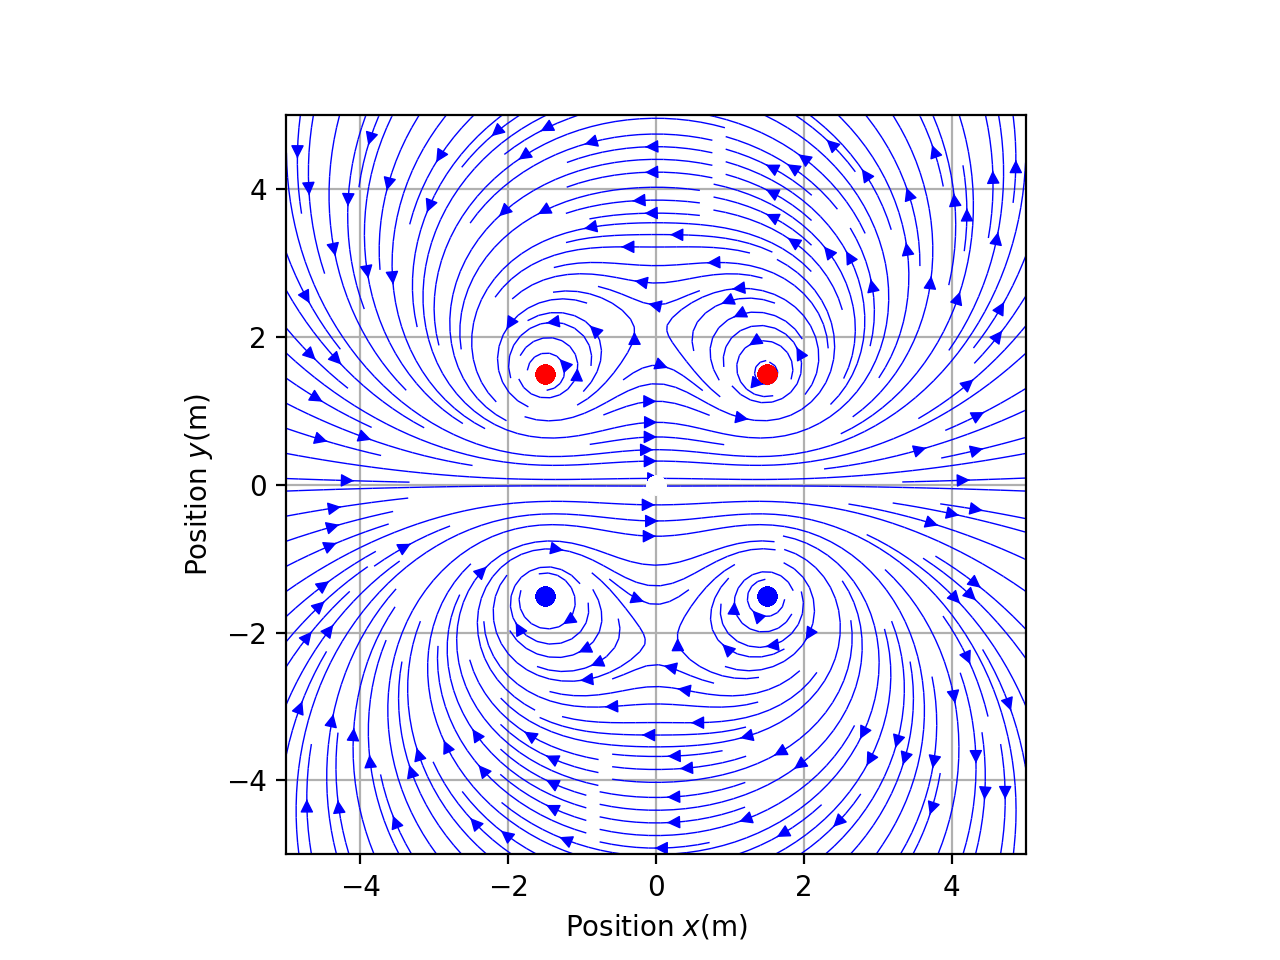

In [12]:
## Lignes de champ
plt.figure("Lignes de champ")

plt.plot(x0,y0,'o',color=c0)
plt.plot(x1,y1,'o',color=c1)
plt.plot(x2,y2,'o',color=c2)
plt.plot(x3,y3,'o',color=c3)
plt.plot(x4,y4,'o',color=c4)

plt.xlim(-2*pos,2*pos)
plt.ylim(-2*pos,2*pos)

plt.streamplot(x, y, BxN, ByN, density=2,linewidth=.5, color='b')
# plt.contour(x,y,V,50,colors='black') # décommenter pour tracer les lignes iso-V 

plt.grid(True)

plt.xlabel(r'Position $x$(m)')
plt.ylabel(r'Position $y$(m)')

plt.axis('scaled')
plt.show()

<IPython.core.display.Javascript object>


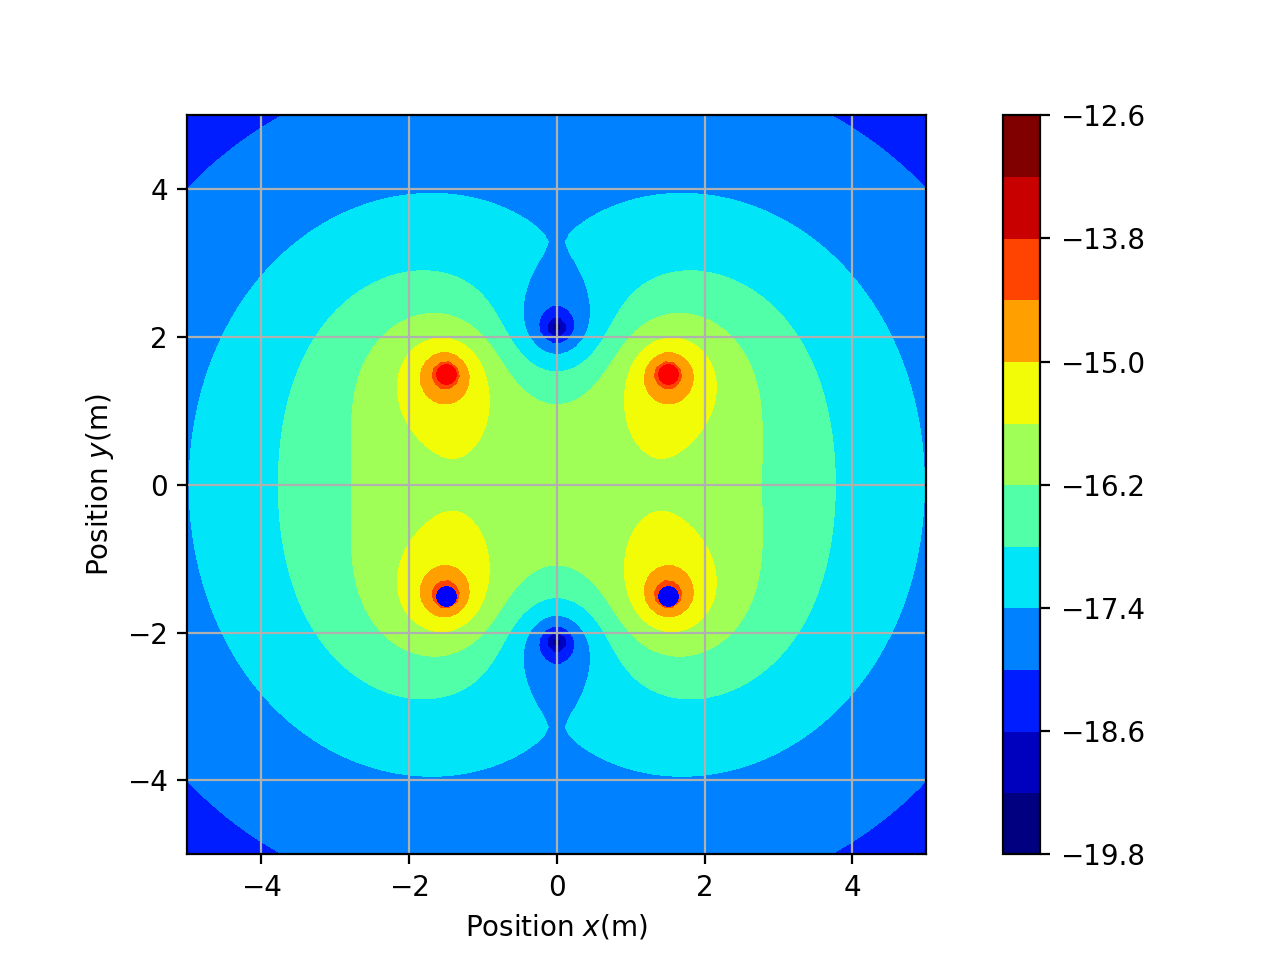

In [13]:
## Contours de norme de B (échelle log)
plt.figure("Contours")
if c0 != 'white':
    plt.plot(x0,y0,'o',color=c0)
if c1 != 'white':
    plt.plot(x1,y1,'o',color=c1)
if c2 != 'white':
    plt.plot(x2,y2,'o',color=c2)
if c3 != 'white':
    plt.plot(x3,y3,'o',color=c3)
if c4 != 'white':
    plt.plot(x4,y4,'o',color=c4)
    
plt.xlim(-2*pos,2*pos)
plt.ylim(-2*pos,2*pos)

plt.contourf(x,y,np.log(B_norm),10,cmap=plt.cm.jet, vmin=np.log(B_norm).min(), vmax=np.log(B_norm).max())
plt.colorbar()
#plt.contour(x,y,V,10,colors='gray')

plt.grid(True)

plt.xlabel(r'Position $x$(m)')
plt.ylabel(r'Position $y$(m)')

plt.axis('scaled')
plt.show()